In [46]:
import time
import random
import cv2
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import struct

from matplotlib.widgets import Cursor
from PIL import Image, ImageDraw
import hashlib
from yolo_opencv import detect_object
import pandas as pd
from ultralytics import YOLO
import numpy as np
import sys
sys.set_int_max_str_digits(100000)

%matplotlib inline

In [47]:
image=cv2.imread("C:/Users/Kaushal Shelke/Desktop/X/Final YOLO/test_int_img/335.png")

In [48]:
double_list = [(3188573363, 195304540, 3849354350.04, 2550773973, 3262175258.0)]

In [49]:
def double_to_binary(double_list):
    # Convert the list of doubles to a NumPy array with double-precision
    double_array = np.array(double_list, dtype=np.float64)
    # Convert the NumPy array to a binary string
    binary_string = double_array.tobytes()
    binary_data = ''.join(format(x, '08b') for x in binary_string)

    return binary_data

In [50]:
def binary_to_double(binary_data):
    byte_data = bytes(int(binary_data[i:i+8], 2) for i in range(0, len(binary_data), 8))
    # Convert the binary string to a NumPy array with double-precision
    double_array = np.frombuffer(byte_data, dtype=np.float64)

    # Convert the NumPy array back to a list of doubles
    double_list = double_array.tolist()

    return double_list

In [51]:
def encode_binary_data(img, binary_data):
    if len(binary_data) == 0:
        raise ValueError('Data is empty')

    no_bytes = (img.shape[0] * img.shape[1] * 3) // 8

    print("Maximum bytes to encode:", no_bytes)
    data_len = len(binary_data)
    

    data_index = 0

    for i in img:
        for pixel in i:
            if data_index < data_len:
                # hiding the data into LSB(Least Significant Bit) of Red Pixel
                pixel[0] = int(format(pixel[0], '08b')[:-1] + binary_data[data_index], 2)
                data_index += 1

            if data_index < data_len:
                # hiding the data into LSB of Green Pixel
                pixel[1] = int(format(pixel[1], '08b')[:-1] + binary_data[data_index], 2)
                data_index += 1

            if data_index < data_len:
                # hiding the data into LSB of Blue Pixel
                pixel[2] = int(format(pixel[2], '08b')[:-1] + binary_data[data_index], 2)
                data_index += 1

            # if data is encoded, just break out of the Loop
            if data_index >= data_len:
                break

    #plt.imshow(img)
    bin_img = img
    return bin_img , data_len

Maximum bytes to encode: 24576
data length is :  320


<Figure size 1000x500 with 0 Axes>

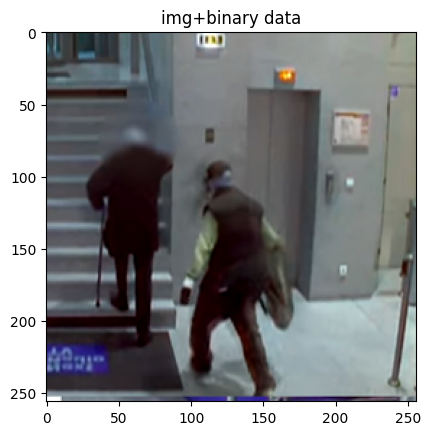

<Figure size 1000x500 with 0 Axes>

In [52]:
#data_len = len(double_to_binary(double_list))
#print("binary is : ",binary_data)

binary_data = double_to_binary(double_list)
bin_img ,data_len = encode_binary_data(image, binary_data)
print("data length is : ",data_len)
plt.imshow(bin_img)
plt.title("img+binary data")
plt.figure(figsize=(10, 5))

In [53]:
def extract_binary_data(img, data_length):
    binary_data = ""
    data_index = 0

    for i in img:
        for pixel in i:
            if data_index >= data_length:
                break

            red_lsb = format(pixel[0], '08b')[-1]
            green_lsb = format(pixel[1], '08b')[-1]
            blue_lsb = format(pixel[2], '08b')[-1]

            binary_data += red_lsb
            binary_data += green_lsb
            binary_data += blue_lsb
            data_index += 3
            
    binary_data = binary_data[:data_length]

    return binary_data

ext_bin_data = extract_binary_data(bin_img, data_len)
print("Extracted binary length:", len(ext_bin_data))
print("Extracted binary str :", ext_bin_data)

In [55]:
ext_bin_data = extract_binary_data(bin_img, data_len)
re_double_list = binary_to_double(ext_bin_data)
print("Reconstructed Double List:", re_double_list)
print("datatype is : ",type(re_double_list))

Reconstructed Double List: [3188573363.0, 195304540.0, 3849354350.04, 2550773973.0, 3262175258.0]
datatype is :  <class 'list'>


In [56]:
def convert_float_to_int_or_keep(data_list):
    result = []
    for item in data_list:
        # Check if the item is a float with no decimal places
        if item == int(item):
            result.append(int(item))
        else:
            result.append(item)
    return result


In [57]:
new_list = convert_float_to_int_or_keep(re_double_list)
print(new_list)

[3188573363, 195304540, 3849354350.04, 2550773973, 3262175258]
